In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
import pyglstudy as gl
from pyglstudy.group_lasso import *
import numpy as np
import matplotlib.pyplot as plt
from copy import deepcopy

In [47]:
n = 1000
p = 100
n_groups = int(p/1)
seed = 0
alpha = 1.0

np.random.seed(seed)
X, beta, y, groups, group_sizes = generate_group_lasso_data(
    n, p, n_groups, rho=0
).values()

# IMPORTANT: pack must be created before calling the next cell.
# group_lasso will modify the pack details
pack = generate_group_lasso_state(
    X, y, groups, group_sizes, alpha, 
    log10_min_ratio=-2, 
    max_cds=int(1e5),
    newton_max_iters=10000,
)

In [48]:
pack

CommonPack(groups=array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99],
      dtype=int32), group_sizes=array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32), alpha=1.0, penalty=array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 

In [49]:
pack1 = deepcopy(pack)
pack2 = deepcopy(pack)
pack3 = deepcopy(pack)

In [50]:
%%time
gl_out = group_lasso(X, pack1, fit_type='data')

CPU times: user 6.48 ms, sys: 129 µs, total: 6.61 ms
Wall time: 6.54 ms


In [51]:
%%time
gl_out2 = group_lasso(X, pack2, fit_type='data_newton')

CPU times: user 6.75 ms, sys: 605 µs, total: 7.36 ms
Wall time: 7.27 ms


In [52]:
A = np.asfortranarray(X.T @ X)

In [53]:
%%time
gl_out3 = group_lasso(A, pack3, fit_type='full_cov')

CPU times: user 5.1 ms, sys: 323 µs, total: 5.42 ms
Wall time: 5.51 ms


In [54]:
gl_out['rsqs'] / np.linalg.norm(y) ** 2,  gl_out2['rsqs'] / np.linalg.norm(y) ** 2

(array([0.        , 0.00589027, 0.01398992, 0.0294031 , 0.04718066,
        0.06708771, 0.0983045 , 0.13128079, 0.16514397, 0.20000999,
        0.23557657, 0.26886825, 0.30160807, 0.33564881, 0.36938499,
        0.40099715, 0.43319625, 0.46339999, 0.49225901, 0.52056545,
        0.54764539, 0.57245668, 0.59588219, 0.61735678, 0.63727465,
        0.65787741, 0.67792062, 0.69761824, 0.71578522, 0.73355409,
        0.75039406, 0.7671538 , 0.78299301, 0.79767076, 0.81140736,
        0.82439434, 0.83674586, 0.84836723, 0.85917048, 0.86935238,
        0.8788382 , 0.88748147, 0.89553084, 0.9030065 , 0.90992916,
        0.91640618, 0.92242221, 0.92795211, 0.93306649, 0.93775259,
        0.94205107, 0.94596761, 0.94961539, 0.95299215, 0.95606884,
        0.95887221, 0.96144773, 0.96385444, 0.96606977, 0.96811361,
        0.96998633, 0.97175862, 0.97339461, 0.97492045, 0.97631087,
        0.97758514, 0.97874651, 0.97980912, 0.98078194, 0.9816777 ,
        0.98249405, 0.98324238, 0.98394197, 0.98

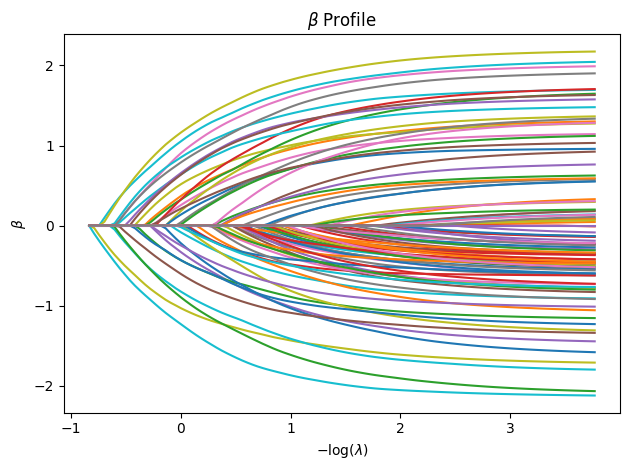

In [55]:
min_idx = np.unravel_index(np.argmin(gl_out['betas']), shape=gl_out['betas'].shape)[0]
max_idx = np.unravel_index(np.argmax(gl_out['betas']), shape=gl_out['betas'].shape)[0]

for j in range(gl_out['betas'].shape[0]):
    if j == min_idx or j == max_idx: continue
    plt.plot(-np.log(gl_out['lmdas']), gl_out['betas'][j].todense().reshape((-1,1)))
plt.title('$\\beta$ Profile')
plt.xlabel('$-\log(\lambda)$')
plt.ylabel('$\\beta$')
plt.tight_layout()
plt.show()

In [56]:
np.max(gl_out['betas']-gl_out3['betas']), np.max(gl_out2['betas'] - gl_out3['betas'])

(5.218048215738236e-15, 5.218048215738236e-15)